# Election Poll Data Analysis


In [1]:
#Data Analysis imports
from __future__ import division


import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



#Imports to grab and parse data from the web
import requests

from io import StringIO

We'll grab the poll data from _HuffPost Pollster_, and we'll use StringIO to prevent errors with pandas.

In [2]:
#url for the poll data
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"

#Using requests to get the data in text form
source = requests.get(url).text

#Using String IO to prevent IO errors with pandas
poll_data = StringIO(source)

In [3]:
#Reading the csv object into a pandas dataframe
poll_df = pd.read_csv(poll_data)

In [4]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [5]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


### Who was being polled and what was their party affiliation?

Quickly visualising the affiliations of the different pollsters.

C:\Users\Diogo\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


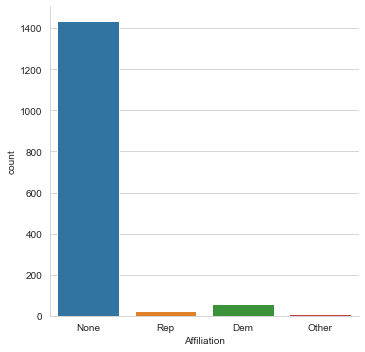

In [6]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

Most of the polls have no affiliation; though there's stronger affiliation for Democrats than for Republicans.

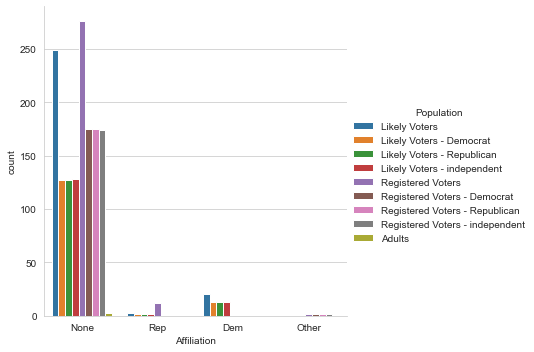

In [7]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

As there's a strong sample of registered voters that are not affiliated, we can hope that the poll data is a good representation of the upcoming elections.

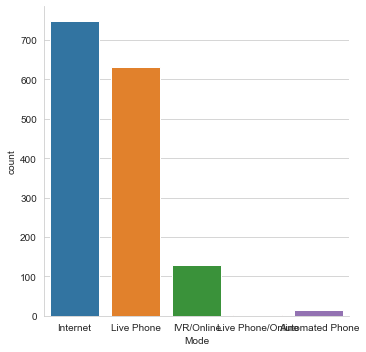

In [8]:
sns.factorplot('Mode',data=poll_df,kind='count')

### Did the poll results favour Clinton or Trump?

In [9]:
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068


In [10]:
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations','Question Iteration'],axis=0,inplace=True)

std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


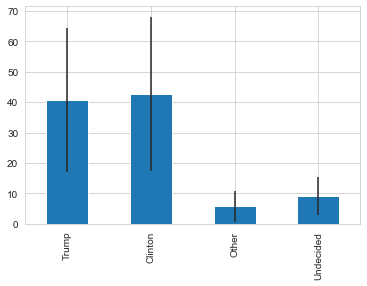

In [11]:
avg.plot(yerr=std,kind='bar',legend=False)

The race seems to be really close, with results in favour of Clinton with a higher standard deviation than for Trump.

In [12]:
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','Stdev']

poll_avg

,Average,Stdev
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [13]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


### How did voter sentiment change over time?

In [14]:
from datetime import datetime

poll_df['Difference'] = (poll_df.Clinton - poll_df.Trump)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,-0.02


The difference is Clinton - Trump. So a positive difference indicates a Clinton lead, and a negative difference indicates a Trump lead.

In [15]:
#Grouping polls by the start data
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.tail()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
262,2016-10-31,30546.600000,45.200000,48.600000,3.333333,3.333333,1.400000,0.034000
263,2016-11-01,734.125000,45.500000,43.571429,4.642857,2.384615,1.285714,-0.019286
264,2016-11-02,1748.400000,40.823529,42.411765,6.941176,6.823529,1.470588,0.015882
265,2016-11-03,1386.250000,43.285714,46.428571,4.428571,2.000000,1.000000,0.031429
266,2016-11-04,1144.461538,43.052632,43.789474,4.052632,4.578947,1.052632,0.007368


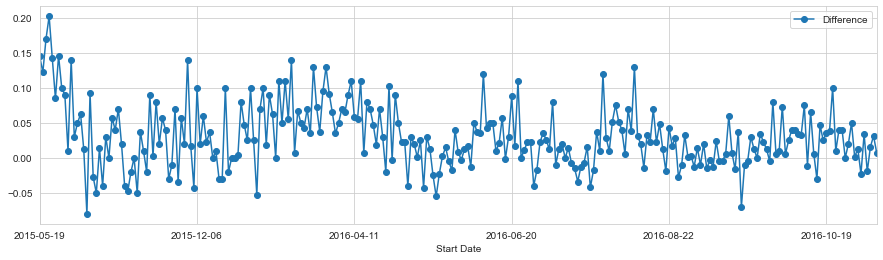

In [16]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-')

The visualisation indicates that Trump has a slight lead in the polls, on average. __Keep in mind that this is without accounting for the weights of different polls, demographics, and affiliations of the population polled.__ 

The latest start date in our grouped dataframe is 27-September-2016.

### Can we see an effect in the polls from the debates?

Another interesting thing that we can look into, is what happened on the days leading up to the first debate, and afterwards. We know that the debate was on 26-September-2016, so we'll plot the trends for the month of September.

To get a list of indices for September, we'll loop through the dataframe, and append any row with a September start date to the list.

In [17]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2016-09':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1
        
print ("First September Index: " + str(min(xlimit)))
print ("Last (Available) September Index: "+ str(max(xlimit)))

First September Index: 209
Last (Available) September Index: 231


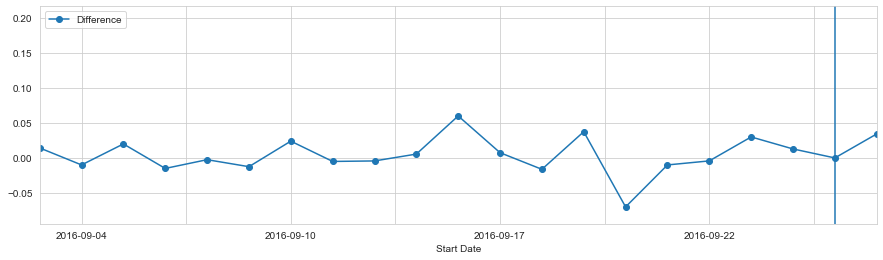

In [18]:
poll_df.plot('Start Date','Difference',figsize=(15,4),marker='o',linestyle='-',xlim=(209,229))

#Vertical line for debate date
plt.axvline(x=228)

And what it looks like, is that the sentiment shifted slightly in favour of Trump, after the debate. Again, it's important to keep in mind that we're dealing with averages.